## Sample Script for 1 df


TODO: read Prediction of pain using electrocardiographic-derived autonomic measures: A systematic review

interesting signal quality assessment: https://github.com/HealthSciTech/E2E-PPG

In [1]:
from pathlib import Path

if Path.cwd().stem == "features":
    %cd ../..
    %load_ext autoreload
    %autoreload 2

/Users/visser/drive/PhD/Code/pain-measurement


In [2]:
import logging
import os
from dataclasses import dataclass
from functools import reduce
from pathlib import Path
from typing import Dict, List

import neurokit2 as nk
import numpy as np
import pandas as pd
import polars as pl

from src.data.config_data import DataConfigBase
from src.data.config_data_imotions import IMOTIONS_LIST, iMotionsConfig
from src.data.config_data_raw import RAW_DICT, RAW_LIST, RawConfig
from src.data.config_participant import PARTICIPANT_LIST, ParticipantConfig
from src.data.make_dataset import load_dataset, load_participant_datasets
from src.features.quality_checks import check_sample_rate
from src.features.transformations import map_participant_datasets
from src.log_config import configure_logging

configure_logging(stream_level=logging.DEBUG, ignore_libs=["matplotlib"])

pl.Config.set_tbl_rows(7);  # don't print too many rows in the book

In [4]:
raw = load_dataset(PARTICIPANT_LIST[1], RAW_DICT["ecg"]).dataset
check_sample_rate(raw)
check_sample_rate(raw, unique_timestamp=True)
raw

15:42:35 | DEBUG   | process_data | Dataset 'ecg' for participant 004_zoey2 loaded from data/raw/004_zoey2/004_zoey2_ecg.csv
15:42:35 | DEBUG   | quality_check | Sample rate per trial: [128.01]
15:42:35 | INFO    | quality_check | The mean sample rate is 128.01.
15:42:35 | INFO    | quality_check | Checking sample rate for unique timestamps.
15:42:35 | DEBUG   | quality_check | Sample rate per trial: [69.52]
15:42:35 | INFO    | quality_check | The mean sample rate is 69.52.


Timestamp,ECG_LL-RA,ECG_LA-RA,ECG_Vx-RL,Trial
f64,f64,f64,f64,f64
112067.4404,30.015868,17.105087,-605.000072,0.0
112067.4404,29.682955,16.8805,-605.000072,0.0
112073.4252,30.241176,17.280919,-605.000072,0.0
…,…,…,…,…
392081.2114,29.661246,16.459814,-605.000072,0.0
392095.1702,30.193936,16.828428,-605.000072,0.0
392095.1702,29.56417,16.384447,-605.000072,0.0


In [5]:
raw.plot(x="Timestamp", y="ECG_LL-RA")

:Curve   [Timestamp]   (ECG_LL-RA)

In [5]:
raw = raw.to_pandas()
ecg = raw["ECG_LL-RA"]
processed_ecg, info = nk.ecg_process(ecg, sampling_rate=500)
processed_ecg.ECG_Quality.mean()

0.9742336755167686

In [6]:
import neurokit2 as nk

ecg = df_stimuli["ECG LL-RA CAL"].dropna()
ecg
processed_ecg, info = nk.ecg_process(ecg, sampling_rate=500)
# Plot
nk.ecg_plot(processed_ecg, info=info)
fig = plt.gcf()
fig.set_size_inches(10, 12, forward=True)
processed_ecg.ECG_Quality.mean()

NameError: name 'df_stimuli' is not defined

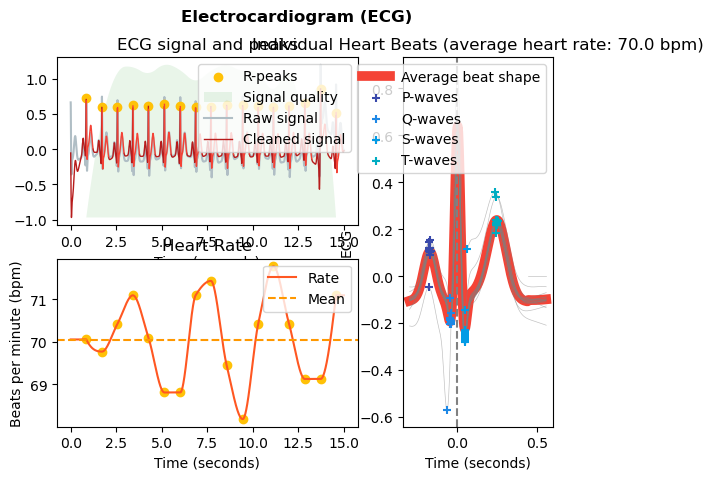

In [ ]:
# Generate 15 seconds of ECG signal (recorded at 250 samples/second)
ecg = nk.ecg_simulate(duration=15, sampling_rate=250, heart_rate=70)

# Process it
signals, info = nk.ecg_process(ecg, sampling_rate=250)

# Visualise the processing
nk.ecg_plot(signals, info)

In [ ]:
signals = nk.ecg_clean(ecg, sampling_rate=500, method="neurokit")
nk.ecg_quality(
    signals, rpeaks=None, sampling_rate=512, method="zhao2018", approach="fuzzy"
)

'Barely acceptable'